<a href="https://colab.research.google.com/github/Jonaminio/machine_learning/blob/main/FERRAMENTA_WEB_PARA_AUX%C3%8DLIO_DE_DIAGN%C3%93STICO_DE_C%C3%82NCER_DE_PELE_COM_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'skin-cancer-mnist-ham10000:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F54339%2F104884%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240607%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240607T002947Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7e89b50129275c9bbccf65b80ee181d06f6d8be6eca1a5e4355cf56c7618a3e2e21815cc8369715b44f81b575ce44ecc936fe5ba48cb5fbc01cbd6cd9f33147c05fb782c5835919434868e15bfcebaa7f7df7bb1acf519a5b1754335d5f275e6cf75b475de4516dc3f93006ac2473e6f22991f1bab9766ea415ba4e75f976729cf45e17811891399585ff245c79e854fb1a22f7fcc2565501fa6575761a59c4e6f60ea0b26f2bce828e2cceca3144fe3144f843e1ac656c238b122bc6c14c142d5e37c9a0d1423177d677201921ab81b3f18050b367fabaadfcfdf25d79848139b5edf1f818d576a69853e7f1e1f9c7e52260f1e5c6586a9450d1b7995c95fa0,teste-tcc-jonas:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4668757%2F7951525%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240607%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240607T002947Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5ede653cc7068f524a924e73e36da2be2a2aa49da9473279dcefc847acca795f8157e336d4c31615273dcc22b405dd69ee88675f5b5ab202cb7b5796680d6f4a9b034d3913d6a515c8910a177856583bfc1315b1e9f92e3a2ced8be7d06bffea14b9ebcb3cce85470b7d1e2eda0ed6b5e2153318abf42ea99cf8287c6128fae52bae310d45992789abde3c74739896886466bbbb363d4ad23fb919eba7cf371f76a16e8c3800f2b349e54e912c706269119c6cb36f1faacc041c90657cba8e21bd5b6d119db841fc92d09a9079e7ce5dff295201ce143ab4e38b34633f2d9a6aebf368b0ccdf55b03435eb62bd7dd6edfd0e55436d9dfbaa6032b87a550b501c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Análise de Câncer de Pele

## Sobre O Problema

**O que é:**

* Crescimento anormal e descontrolado das células da pele.
* Tumor maligno que pode se desenvolver em qualquer parte do corpo.
* Mais comum em áreas expostas ao sol.

**Dificuldade de Detecção:**

* Difícil diferenciar de outras lesões benignas.
* Atraso no diagnóstico e tratamento.

**Sintomas:**

* Mudança de cor, tamanho ou forma de manchas.
* Feridas que não cicatrizam.
* Pintas que coçam, sangram ou crostam.
* Caroços na pele.
* Áreas de vermelhidão ou descamação.

**Prevenção:**

* Evitar exposição excessiva ao sol.
* Usar protetor solar com FPS de no mínimo 30.
* Evitar câmaras de bronzeamento artificial.

**Diagnóstico:**

* Consulta com dermatologista.
* Exame físico da pele.
* Biópsia da lesão.

**Tratamento:**

* Cirurgia.
* Radioterapia.
* Quimioterapia.
* Imunoterapia.


## Sobre o Dataset

Este é o conjunto de dados HAM10000 ("Human Against Machine com 10.000 imagens de treinamento"). Composto por 10.015 imagens dermatoscópicas, este conjunto é disponibilizado como uma ferramenta de treinamento para fins acadêmicos em aprendizado de máquina. Publicamente acessível através do arquivo ISIC, esses dados de referência são valiosos para estudos comparativos entre algoritmos de aprendizado de máquina e a expertise humana na análise de imagens dermatoscópicas.

Contem 7 diferentes classes de Cancer de pele, listadas abaixo:
1. Melanocytic nevi (Nevo melanocítico)
2. Melanoma (Melanoma)
3. Benign keratosis-like lesions (Lesões benignas semelhantes a queratose)
4. Basal cell carcinoma (Carcinoma de células basais)
5. Actinic keratoses (Queratoses actínicas)
6. Vascular lesions (Lesões vasculares)
7. Dermatofibroma (Dermatofibroma)

## Objetivos

Neste kernel, meu objetivo é detectar 7 classes diferentes de câncer de pele utilizando Redes Neurais Convolucionais com Keras TensorFlow como backend. Em seguida, analisarei os resultados para entender como o modelo pode ser útil no cenário prático. Vamos seguir o processo passo a passo para classificar as 7 classes de câncer de pele.

Neste kernel, segui as respectivas etapas para construção e avaliação de modelo, que são as seguintes:<br>
**01 : Importar Bibliotecas Essenciais**<br>
**02: Entendimento do Problema e dos Dados** <br>
**03: Data Cleaning** <br>
**04: Pré-processamento dos Dados** <br>
**05: Train Test Split**<br>
**06: Construção do Modelo**<br>
**07: Fitting do modelo e Acompanhamento de Desempenho**<br>
**08: Avaliação do Modelo** <br>

# 01 - Importar Bibliotecas Essenciais

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm
import tensorflow as tf
import keras
import numpy as np
import cv2
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception,ResNet152V2,EfficientNetB7
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from numpy.random import seed


2024-05-05 22:09:47.499549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 22:09:47.499641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 22:09:47.624582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 02 - Entendimento do Problema e dos Dados

In [ ]:
# Lendo a data
path = '../input/skin-cancer-mnist-ham10000/'
images_path = {os.path.splitext(os.path.basename(x))[0]:x for x in glob.glob(os.path.join(path,'*','*.jpg'))}

In [ ]:
# Atribuindo Valores as categorias para melhor compreensão do caso

lesion_type_dict = {
    'nv': 'Nevo melanocitico',
    'mel': 'Melanoma',
    'bkl': 'Lesoes benignas semelhantes a queratose',
    'bcc': 'Carcinoma de celulas basais',
    'akiec': 'Queratoses actínicas',
    'vasc': 'Lesoes Vasculares',
    'df': 'Dermatofibroma'
}

In [ ]:
# Lendo CSV com metadados
skin_df = pd.read_csv('../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

In [ ]:
# Criação de novas colunas
# O caminho das imagens
skin_df['path'] = skin_df['image_id'].map(images_path.get)
# O tipo de lesão em extenso
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get)
# Atribuição de um cod aos tipos de lesões
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3


Variaveis Importantes

1. **localization**: Esta é uma variável indica onde foi localizada a lesão.

2. **image_id**: Esta é uma variável que contém identificadores únicos para cada imagem.

3. **cell_type**: Esta variável é uma forma abreviada de representar o tipo de lesão presente em cada imagem. É uma string que contém o nome abreviado do tipo de lesão.

4. **cell_type_idx**: Esta variável é uma coluna categórica que categoriza o tipo de lesão em códigos numéricos de 0 a 6. Esses códigos são atribuídos para representar diferentes tipos de lesões de forma numérica para facilitar análises futuras.

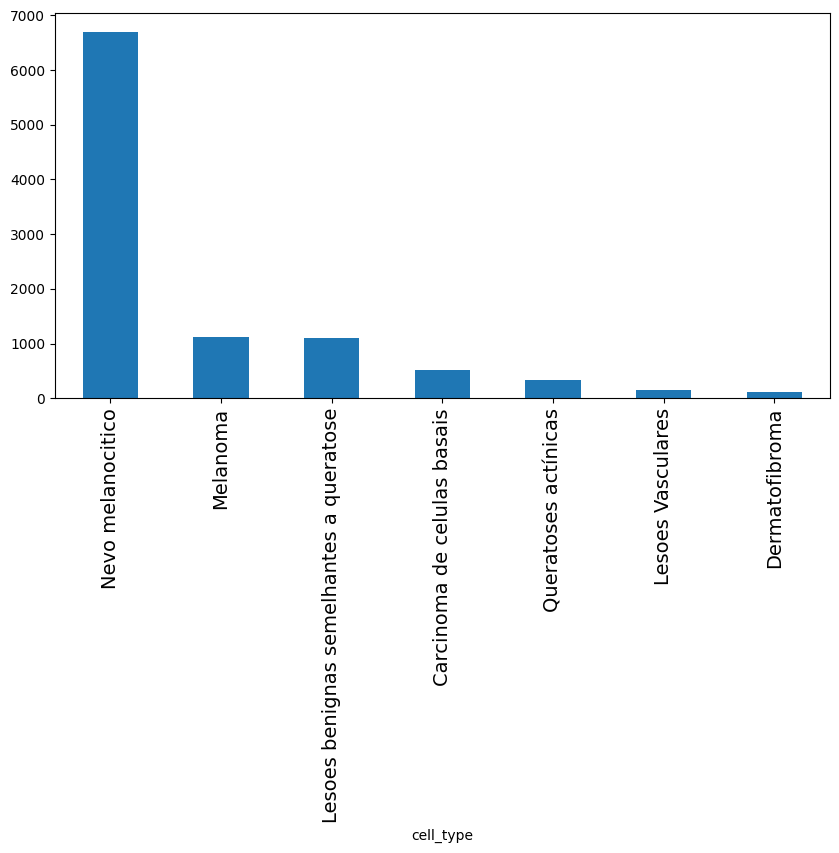

In [ ]:
# Exibindo a distribuição dos tipos de lesões
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)
ax1.tick_params(axis='x', labelsize=14)  # Ajuste o tamanho da fonte conforme necessário


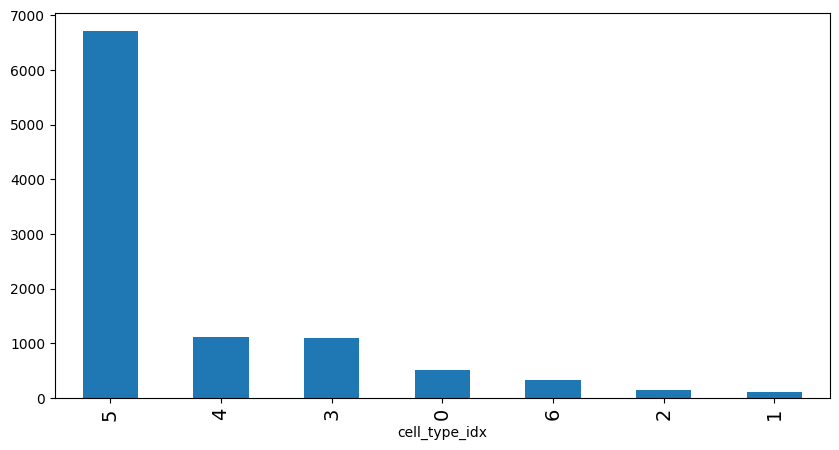

In [ ]:
# Exibindo a distribuição dos tipos de lesões
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type_idx'].value_counts().plot(kind='bar', ax=ax1)

ax1.tick_params(axis='x', labelsize=14)  # Ajuste o tamanho da fonte conforme necessário


## A visualização do campo de Validação Técnica (ground truth), que é o tipo de dx, para ver a distribuição de suas 4 categorias que são listadas abaixo:

1. Histopatologia (Histo): Diagnósticos histopatológicos de lesões excisadas foram realizados por dermatopatologistas especializados.
2. Confocal: A microscopia confocal de reflexão é uma técnica de imagem in vivo com uma resolução em nível quase celular e algumas lesões benignas faciais com uma suposição de mundo cinza de todas as imagens do conjunto de treinamento no espaço de cor Lab antes e depois de mudanças manuais no histograma.
3. Follow-up: Se nevos monitorados por dermatoscopia digital não mostraram nenhuma alteração durante 3 visitas de acompanhamento ou 1,5 anos, biólogos aceitaram isso como evidência de benignidade biológica. Apenas nevos, mas nenhum outro diagnóstico benigno, foram rotulados com este tipo de ground-truth porque dermatologistas geralmente não monitoram dermatofibromas, queratoses seborreicas ou lesões vasculares.
4. Consensus: Para casos benignos típicos sem histopatologia ou seguimento, os biólogos fornecem uma classificação de consenso de especialistas dos autores PT e HK. Eles aplicaram o rótulo de consenso apenas se ambos os autores deram independentemente o mesmo diagnóstico benigno inequívoco. Lesões com esse tipo de groundtruth geralmente foram fotografadas por motivos educacionais e não precisaram de mais acompanhamento ou biópsia para confirmação.

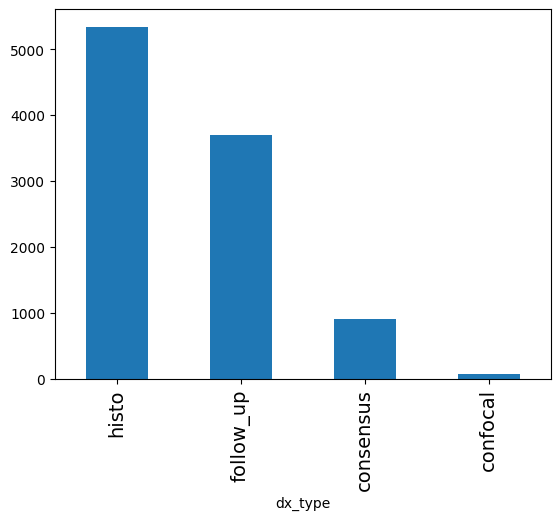

In [ ]:
skin_df['dx_type'].value_counts().plot(kind='bar')
# Obter o objeto do eixo atual
ax = plt.gca()

# Aumentar o tamanho da fonte do eixo y
ax.tick_params(axis='x', labelsize=14)

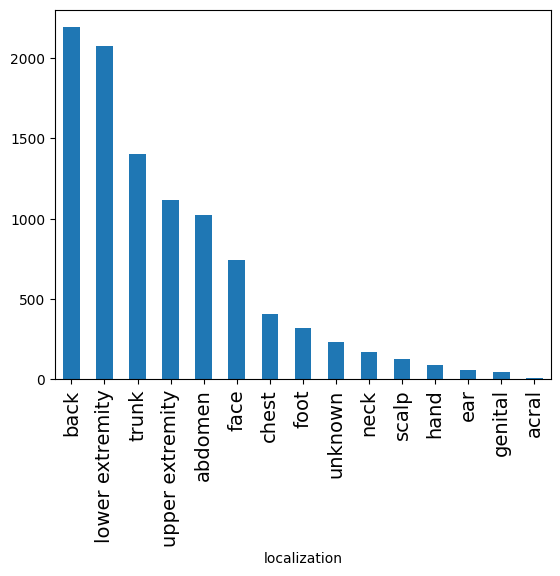

In [ ]:
# Distribuição das lcalizações das lesãoes
skin_df['localization'].value_counts().plot(kind='bar')
# Obter o objeto do eixo atual
ax = plt.gca()

# Aumentar o tamanho da fonte do eixo y
ax.tick_params(axis='x', labelsize=14)

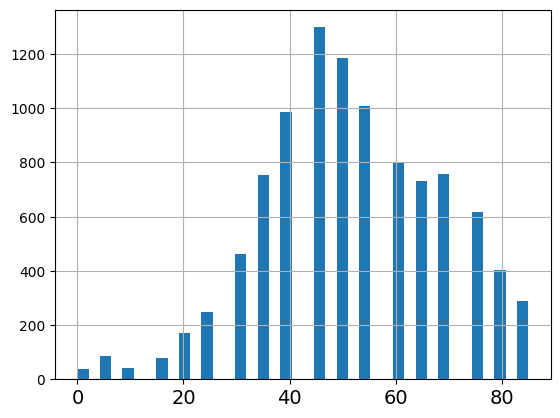

In [ ]:
# Distribuição de Idades
skin_df['age'].hist(bins=40)
# Obter o objeto do eixo atual
ax = plt.gca()

# Aumentar o tamanho da fonte do eixo y
ax.tick_params(axis='x', labelsize=14)

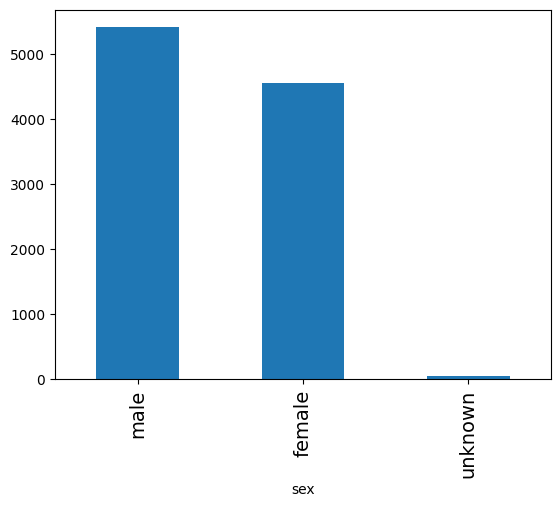

In [ ]:
# Distribuição dos sexos
skin_df['sex'].value_counts().plot(kind='bar')

# Obter o objeto do eixo atual
ax = plt.gca()

# Aumentar o tamanho da fonte do eixo y
ax.tick_params(axis='x', labelsize=14)


# 03 - Data Cleaning

In [ ]:
#verificando clunas vazias
skin_df.isnull().sum().sum()

57

In [ ]:
#quantidade de linhas antes
skin_df.shape[0]

10015

In [ ]:
# Removendo colunas vazias
skin_df.dropna(inplace=True)

In [ ]:
#quantidade de linhas apos
skin_df.shape[0]

9958

## Verifiquei que existem diversos casos de Nevo melanocitico, resolvi normalizar com os demais aplicando a Subamostragem (undersampling): Removendo aleatoriamente exemplos da classe majoritária até que as distribuições de classe estejam mais equilibradas.

In [ ]:
skin_df.groupby(['cell_type', 'dx', 'cell_type_idx']).size()

cell_type                                dx     cell_type_idx
Carcinoma de celulas basais              bcc    0                 514
Dermatofibroma                           df     1                 115
Lesoes Vasculares                        vasc   2                 142
Lesoes benignas semelhantes a queratose  bkl    3                1089
Melanoma                                 mel    4                1111
Nevo melanocitico                        nv     5                6660
Queratoses actínicas                     akiec  6                 327
dtype: int64

In [ ]:
# Selecionar aleatoriamente 5 mil índices das linhas associadas à classe 'nv'
indices_nv = skin_df[skin_df['dx'] == 'nv'].index
indices_amostra = np.random.choice(indices_nv, size=5000, replace=False)

In [ ]:
# Selecionar aleatoriamente 3 mil índices das linhas associadas à classe 'nv'
indices_nv = skin_df[skin_df['dx'] == 'nv'].index
indices_amostra = np.random.choice(indices_nv, size=3000, replace=False)

# Remover as linhas selecionadas
skin_df = skin_df.drop(indices_amostra)

In [ ]:
skin_df.groupby(['cell_type', 'dx', 'cell_type_idx']).size()

cell_type                                dx     cell_type_idx
Carcinoma de celulas basais              bcc    0                 514
Dermatofibroma                           df     1                 115
Lesoes Vasculares                        vasc   2                 142
Lesoes benignas semelhantes a queratose  bkl    3                1089
Melanoma                                 mel    4                1111
Nevo melanocitico                        nv     5                3660
Queratoses actínicas                     akiec  6                 327
dtype: int64

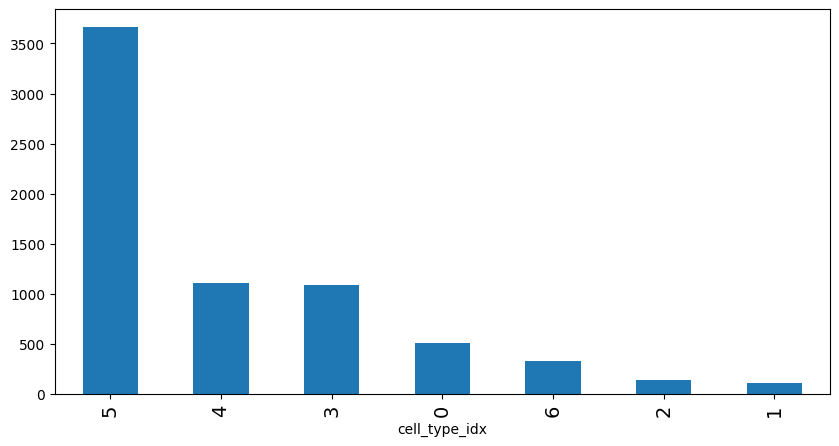

In [ ]:
# Exibindo a distribuição dos tipos de lesões apos ajuste
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type_idx'].value_counts().plot(kind='bar', ax=ax1)

ax1.tick_params(axis='x', labelsize=14)  # Ajuste o tamanho da fonte conforme necessário


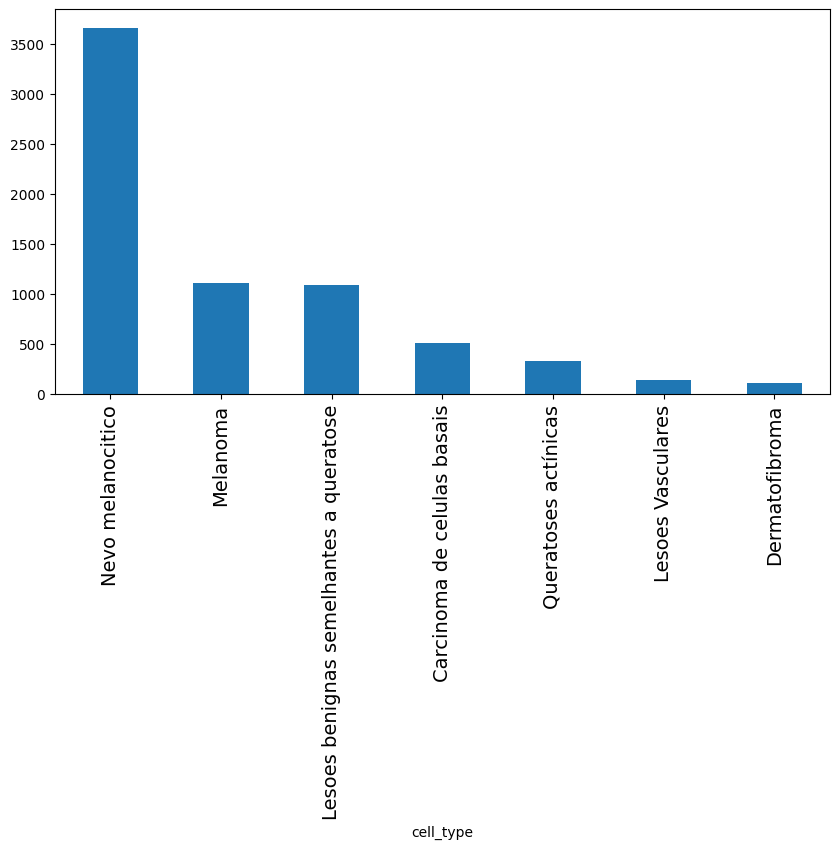

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

# Aumentar o tamanho da fonte do eixo x
ax1.tick_params(axis='x', labelsize=14)  # Ajuste o tamanho da fonte conforme necessário

plt.show()

# 04 - Pré-processamento dos Dados

In [ ]:
# Definindo valor padão para altura e largura imagem
IMG_AL = 150

In [ ]:
# Ler e reduzir as imagens
# atribuindo train_img com valor de imagem em matriz
IMAGE_SIZE = IMG_AL
def read_img(img_path):
  img = cv2.imread(img_path,cv2.IMREAD_COLOR)
  img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
  return img
train_img = []
for img_name in tqdm(skin_df['path'].values):
  train_img.append(read_img(img_name))

100%|██████████| 6958/6958 [02:23<00:00, 48.63it/s]


In [ ]:
# incluindo uma versão em array da imagem no dataset para exibir
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [ ]:
#conferindo dataset
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/ham10000_i...,Lesoes benignas semelhantes a queratose,3,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


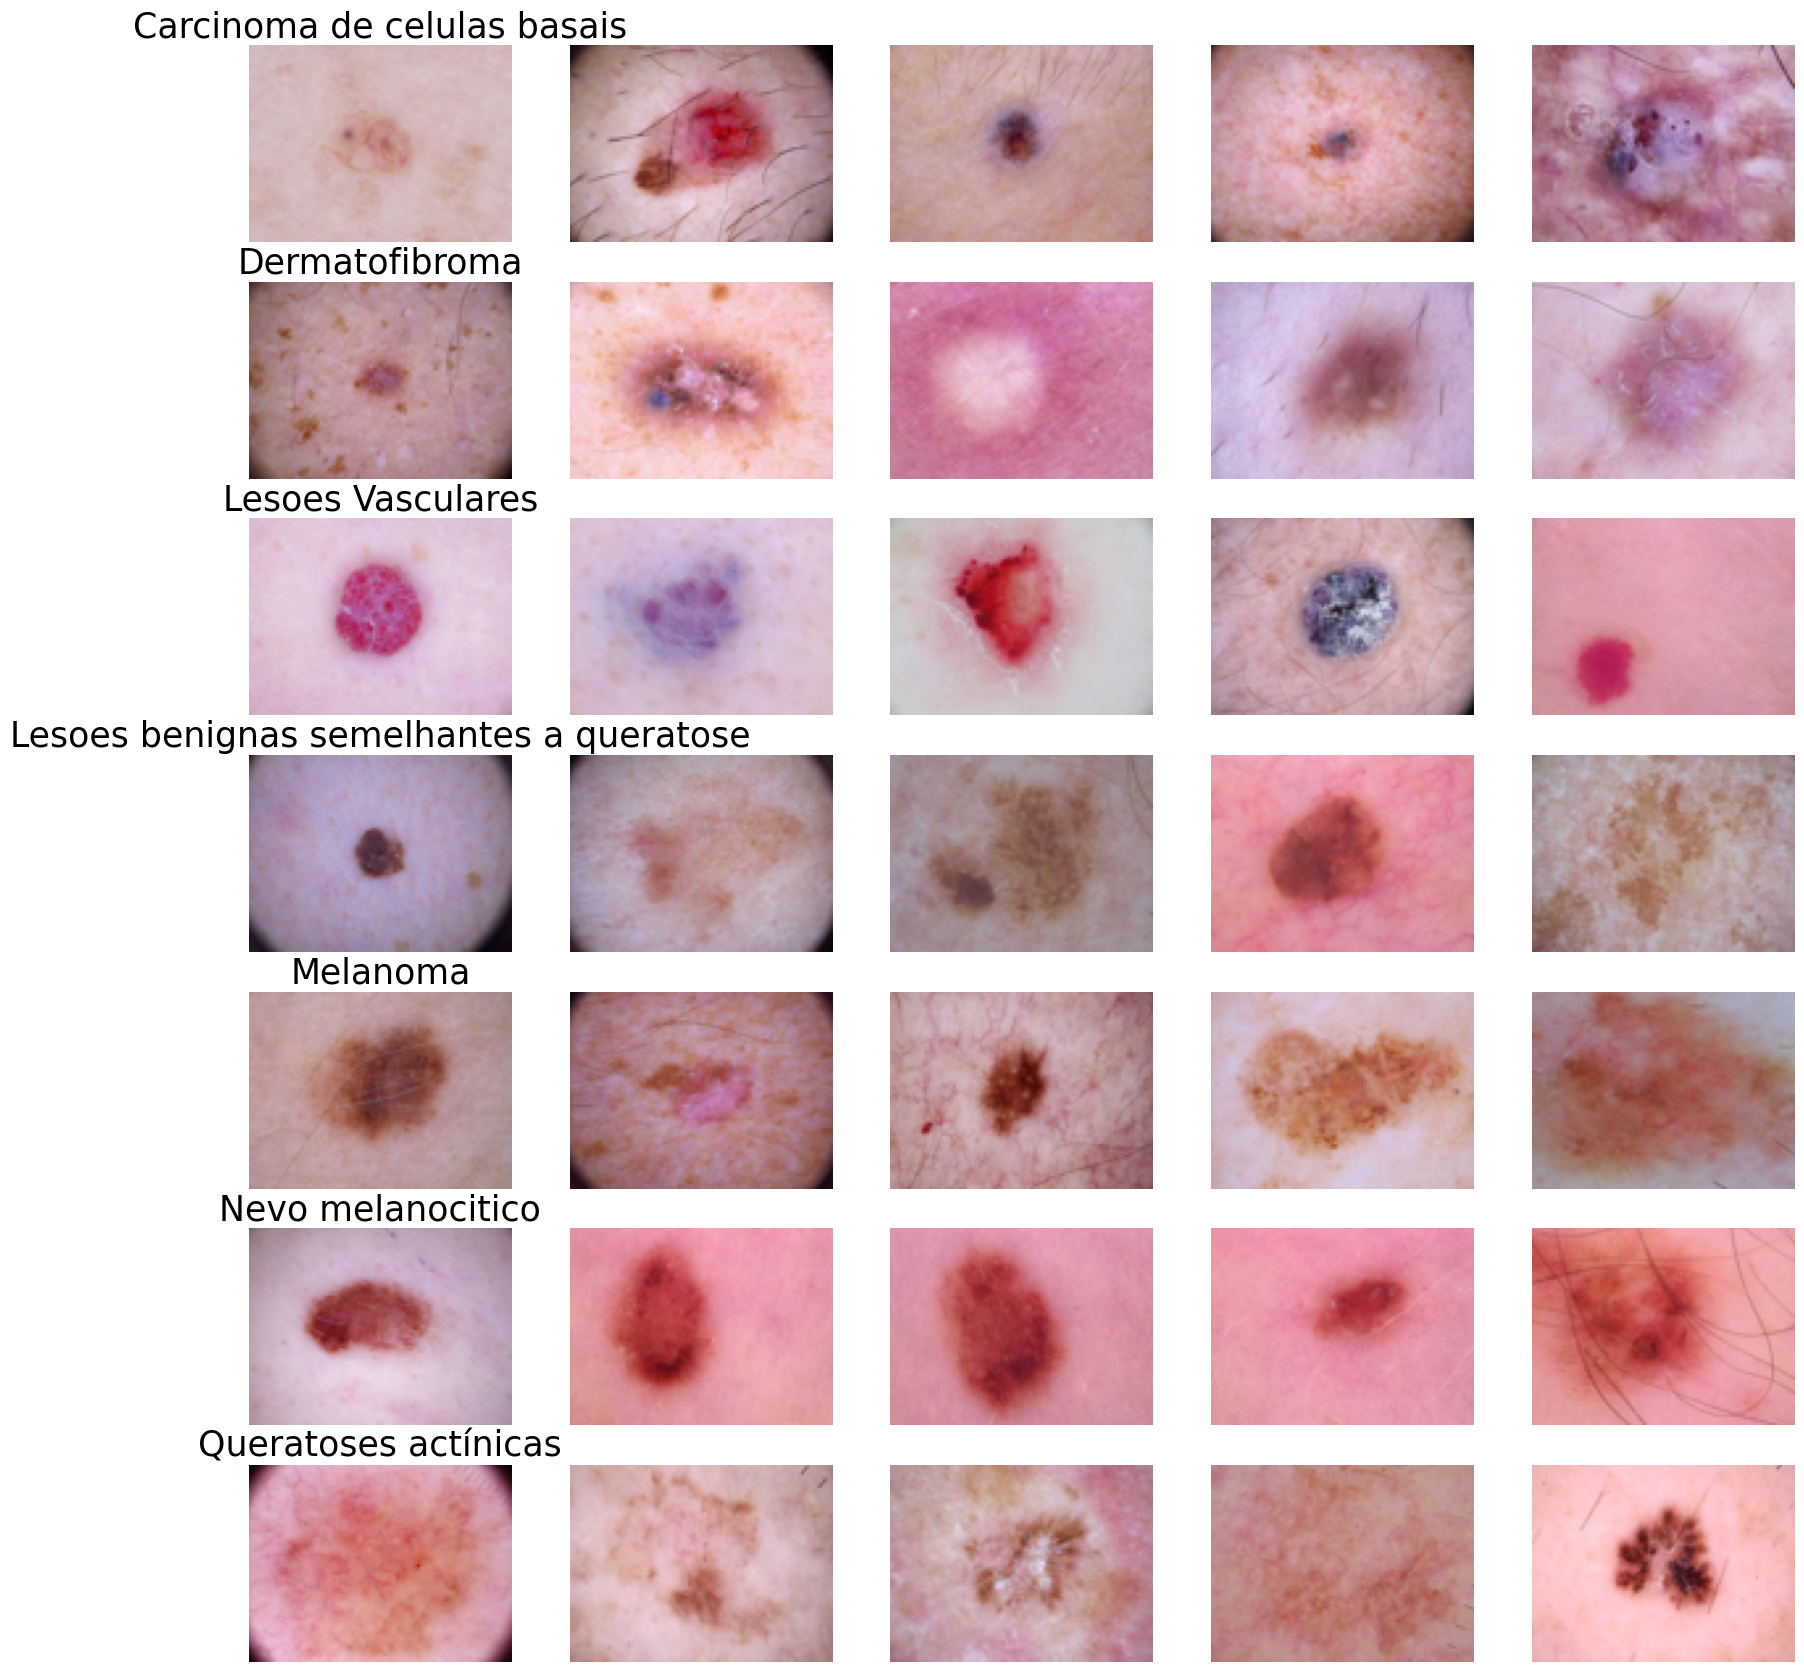

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))

for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name, fontsize=25)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

fig.savefig('category_samples.png', dpi=300)
plt.show()


# 05 - Train Test Split

In [ ]:
# Atribuindo uma variavel
# Reescalar os valores de uma variável para que eles estejam em uma faixa específica

X = np.array(train_img,np.float32)/255
print(X.shape)

(6958, 150, 150, 3)


In [ ]:
# Criaçao do Target (Y)
y = np.array(skin_df['cell_type_idx'])

In [ ]:
# Splitando a data
# 70% treino, 20% validação e 10% teste
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=38,shuffle=True,stratify=y)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.68,random_state=38,shuffle=True,stratify=y_test)

*Devido ao conjunto de dados esta desbalanciado,estou ultilizando o **stratify** para que a divisão entre os conjuntos de treinamento e teste mantenha a **mesma distribuição** de classes que no conjunto de dados original y*


In [ ]:
print("Tamanho do conjunto de treinamento:", (len(x_train) / len(X)) * 100)
print("Tamanho do conjunto de validação:", (len(x_val)/ len(X)) * 100)
print("Tamanho do conjunto de teste:", (len(x_test)/ len(X)) * 100)

Tamanho do conjunto de treinamento: 69.99137683242311
Tamanho do conjunto de validação: 20.408163265306122
Tamanho do conjunto de teste: 9.600459902270767


In [ ]:
# Atribuindo ao keras o numero de categorias contidas no dataset
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes = 7)
y_train = to_categorical(y_train, num_classes = 7)
y_val = to_categorical(y_val , num_classes=7)

# 06 - Construção do Modelo CNN (Redes Neurais Convolucionais)

Irei ultilizar 3 CNNs diferentes para o projeto
1. Xception: Extração de características ricas, facilidade de treinamento e flexibilidade para pesquisa e desenvolvimento.
2. ResNet152V2: Alto desempenho e robustez para diagnósticos precisos.
3. EfficientNet-B7: Equilíbrio entre precisão, desempenho e versatilidade para triagem e detecção.

In [ ]:
#Usando a Xception, uma CNN desenvolvida pela equipe do Google, demonstrou um desempenho excepcional em várias tarefas de visão computacional, como classificação de imagens
#O primeiro valor, IMG_AL, representa a altura da imagem definido anteriormente.
#O segundo valor, também IMG_AL, representa a largura da imagem definido anteriormente.
#O terceiro valor, 3, representa o número de canais de cores da imagem. Nesse caso, é 3
training_shape = (IMG_AL,IMG_AL,3)
# 1 - Xception
# base_model = Xception(include_top=False,weights='imagenet',input_shape = training_shape)
# for layer in base_model.layers:
#     layer.trainable = True

# 2 - ResNet152V2
# base_model = ResNet152V2(include_top=False,weights='imagenet',input_shape = training_shape)
# for layer in base_model.layers:
#     layer.trainable = True

# # 3 - EfficientNetB7
base_model = EfficientNetB7(include_top=False,weights='imagenet',input_shape = training_shape)
for layer in base_model.layers:
    layer.trainable = True

n_classes = 7
model = base_model.output
model = Flatten()(model)
model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
output = Dense(n_classes, activation='softmax')(model)
model = Model(inputs=base_model.input, outputs=output)

258076736/258076736 [==============================] - 11s 0us/step


In [ ]:
#configurando a fase de compilação da rede neural.
#problemas de classificação multiclasse.
#métrica de precisão (accuracy), mantendo a proporção de previsões corretas em relação ao total de previsões.
#optimizer = Adam(lr=0.001)
optimizer = SGD(lr=0.001)
#optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# definindo numero de epocas
n_epoch = 20

#callbacks
#Se não houver uma melhoria na função de perda após um certo número de épocas (determinado pelo parâmetro patience), o treinamento será interrompido prematuramente.
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1,
                           mode='auto', restore_best_weights=True)
#Se não houver uma melhoria na função de perda após um certo número de épocas (determinado pelo parâmetro patience), a taxa de aprendizagem do otimizador será reduzida por um fator (determinado pelo parâmetro factor).
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='auto')

# 07 - Fitting do modelo e Acompanhamento de Desempenho

Processo de treinar o modelo usando um conjunto de dados de treinamento e metricas para avaliação.

In [ ]:
#teste
history = model.fit(x_test,
                    y_test,
                    epochs=n_epoch,
                    callbacks=[reduce_lr,early_stop]
                   )

Epoch 1/20


2024-05-05 22:15:00.884635: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1714947309.831525     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 [==============================] - 96s 547ms/step - loss: 1.6266 - accuracy: 0.4506 - lr: 0.0100
Epoch 2/20
21/21 [==============================] - 11s 547ms/step - loss: 1.1579 - accuracy: 0.6168 - lr: 0.0100
Epoch 3/20
21/21 [==============================] - 11s 543ms/step - loss: 0.8780 - accuracy: 0.7171 - lr: 0.0100
Epoch 4/20
21/21 [==============================] - 11s 545ms/step - loss: 0.7621 - accuracy: 0.7455 - lr: 0.0100
Epoch 5/20
21/21 [==============================] - 11s 545ms/step - loss: 0.7072 - accuracy: 0.7665 - lr: 0.0100
Epoch 6/20
21/21 [==============================] - 11s 546ms/step - loss: 0.6846 - accuracy: 0.7725 - lr: 0.0100
Epoch 7/20
21/21 [==============================] - 11s 544ms/step - loss: 0.5488 - accuracy: 0.8263 - lr: 0.0100
Epoch 8/20
21/21 [==============================] - 11s 547ms/step - loss: 0.4287 - accuracy: 0.8907 - lr: 0.0100
Epoch 9/20
21/21 [==============================] - 11s 545ms/step - loss: 0.3706 - accuracy: 0.908

In [ ]:
#Confusion Matrix Treino
# Predict dos valores do conjunto de dados de validação
y_pred_test = model.predict(x_test)
# Convertendo classes de predict em um vetor
y_pred_classe_test = np.argmax(y_pred_test,axis = 1)
# Convertendo validação em um vetor
y_true_test = np.argmax(y_test,axis = 1)

#Confusion Matrix
matriz_test = confusion_matrix(y_true_test, y_pred_classe_test)

plt.figure(figsize=(4, 3))
sns.heatmap(matriz_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#y_pred_classe_test

In [ ]:
#y_true_test

In [ ]:
# classification_report Treino
report = classification_report(y_true_test, y_pred_classe_test, output_dict=True)
# Converter o dicionário de resultados em um DataFrame do pandas
df_report = pd.DataFrame(report).transpose()
# Imprimir o DataFrame
print(df_report)

In [ ]:
#validação
# history = model.fit(x_val,
#                     y_val,
#                     epochs=n_epoch,
#                     callbacks=[reduce_lr,early_stop]
#                    )

In [ ]:
#treino e validação
history = model.fit(x_train,
                    y_train,
                    epochs=n_epoch,
                    callbacks=[reduce_lr,early_stop],
                    validation_data=(x_val,y_val)
                   )

In [ ]:
# #Confusion Matrix Validação
# # Predict dos valores do conjunto de dados de validação
# y_pred_val = model.predict(x_val)
# # Convertendo classes de predict em um vetor
# y_pred_classe_val = np.argmax(y_pred_val,axis = 1)
# # Convertendo validação em um vetor
# y_true_val = np.argmax(y_val,axis = 1)

# #Confusion Matrix
# matriz_val = confusion_matrix(y_true_val, y_pred_classe_val)

# plt.figure(figsize=(4, 3))
# sns.heatmap(matriz_train, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
#Confusion Matrix Teste
# Predict dos valores do conjunto de dados de validação
y_pred_train = model.predict(x_train)
# Convertendo classes de predict em um vetor
y_pred_classe_train = np.argmax(y_pred_train,axis = 1)
# Convertendo validação em um vetor
y_true_train = np.argmax(y_train,axis = 1)

#Confusion Matrix
matriz_train = confusion_matrix(y_true_train, y_pred_classe_train)

plt.figure(figsize=(4, 3))
sns.heatmap(matriz_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# classification_report Teste e Validação
report = classification_report(y_true_train, y_pred_classe_train, output_dict=True)
# Converter o dicionário de resultados em um DataFrame do pandas
df_report = pd.DataFrame(report).transpose()
# Imprimir o DataFrame
print(df_report)

In [ ]:
#Exibindo resultados das epocas
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='r',marker="o", label="Train_Loss")
ax[0].plot(history.history['val_loss'], color='b',marker="o", label="Val_Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='r',marker="o", label="Train_Acc")
ax[1].plot(history.history['val_accuracy'], color='b',marker="o",label="Val_Acc")
legend = ax[1].legend(loc='best', shadow=True)

# 08 - Avaliação do modelo
Usar casos fora do data set e validar o funcionamento, exibindo as classes correspondentes

In [ ]:
#exibindo os primeiros caminhos do dataset
with pd.option_context('display.max_colwidth', None):
    print(skin_df['path'].head())


0    ../input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027419.jpg
1    ../input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025030.jpg
2    ../input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026769.jpg
3    ../input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025661.jpg
4    ../input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031633.jpg
Name: path, dtype: object


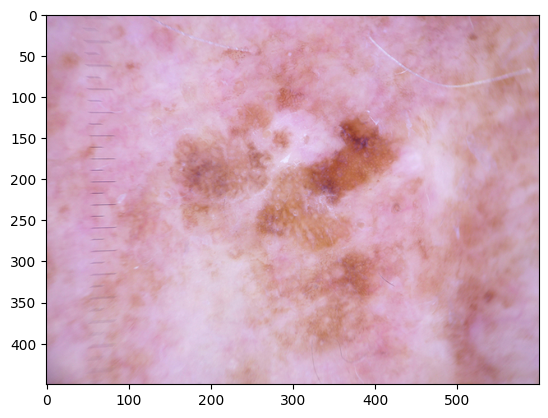

In [ ]:
#Exibindo a Imagem Enviada e mostrando probabilidades das classes
target_size=(IMG_AL,IMG_AL)
image_path = "../input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027419.jpg"
#image_path = '../input/teste-tcc-jonas/img4.jpg'
img = keras.utils.load_img(image_path)
plt.imshow(img)

In [ ]:
# Função para carregar e pré-processar uma única imagem
def preprocessa_image(image_path):
    img = Image.open(image_path)
    img = img.resize((IMG_AL, IMG_AL))
    img = np.array(img) / 255  # Normaliza os valores de pixel para o intervalo [0, 1]
    return img

# Mapeamento das classes para os respectivos rótulos Y
tipos_cancer = {
    0: "Queratoses actínicas (Pré-cancerosas)",
    1: "Carcinoma de celulas basais (Maligno)",
    2: "Dermatofibroma (Benigno)",
    3: "Lesoes benignas semelhantes a queratose (Benigno)",
    4: "Melanoma (Maligno)",
    5: "Nevo melanocitico (Benigno)",
    6: "Lesoes Vasculares (Benigno)"
}

# Carregando o modelo treinado
#model = tf.keras.models.load_model('caminho_do_seu_modelo')

# Função para prever a probabilidade de cada classe para uma imagem
def predict_image(image_path):
    img_array = preprocessa_image(image_path)
    input_img = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão extra para corresponder ao formato de entrada do modelo
    predictions = model.predict(input_img)[0]  # Obtém as probabilidades para todas as classes
    return predictions

# Mudar caminho aqui
predictions = predict_image(image_path)

# # Exibindo as probabilidades de cada classe
# for i, prob in enumerate(predictions):
#     class_label = tipos_cancer[i]
#     print(f"{class_label}: {prob * 100:.2f}%")

# Ordenando as previsões em ordem decrescente de probabilidade
sorted_indices = np.argsort(predictions)[::-1]

#Exibindo as previsões em ordem decrescente de probabilidade
rank = 1
for i in sorted_indices:
    class_label = tipos_cancer[i]
    prob = predictions[i]
    print({rank}, f"{class_label}: {prob * 100:.2f}%")
    rank += 1
